# 第一题

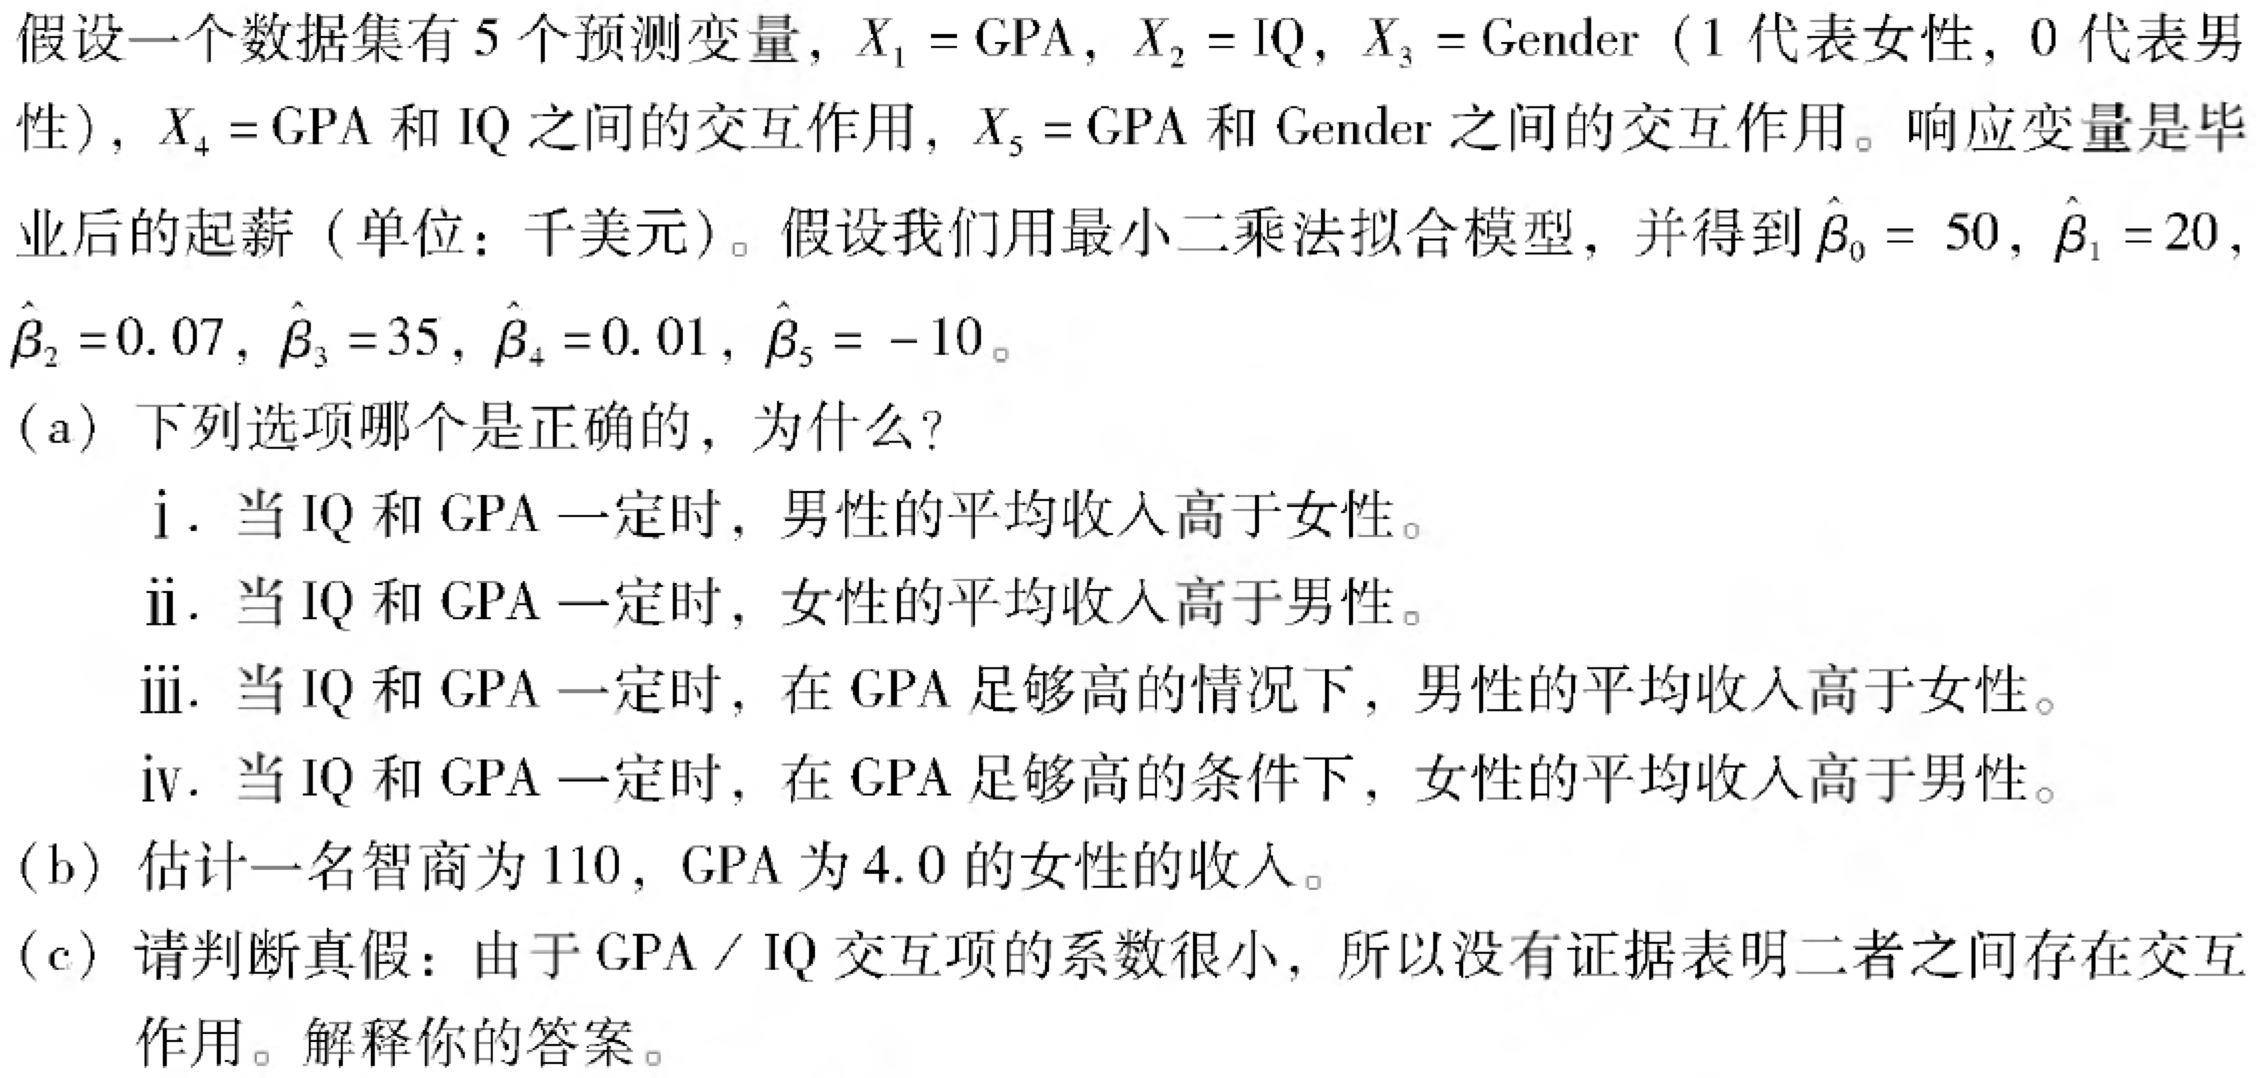

## a

第三个选项正确，因为如果双方GPA足够高，GPA和Gender的交互作用会使男性的平均收入高于女性。

## b

点估计为$50+20\times 4+0.07*110+35+0.01\times 110\times 4-10\times4=137.1(千美元)$

## c

假。系数很小但代表也有作用，系数不显著才表明两者之间不存在交互效应。

# 第二题

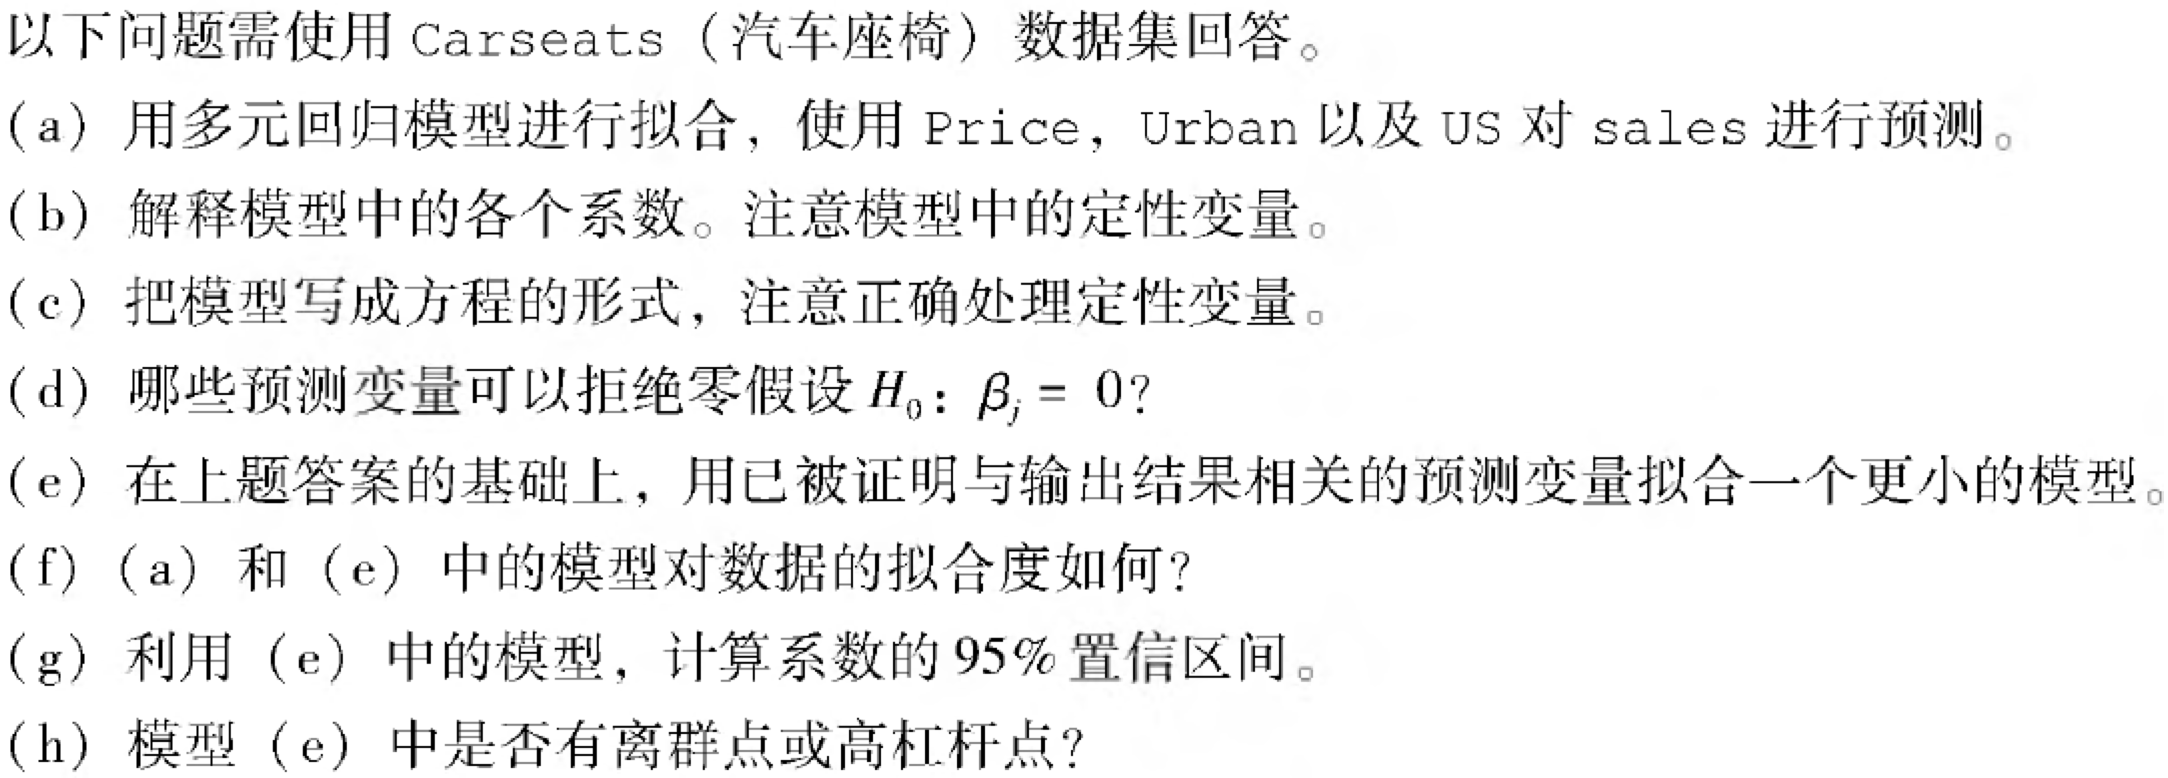

In [74]:
#对Urban和US进行独热编码
data = pd.read_csv('../data/Carseats.csv',index_col=0)
data.loc[data['Urban']=='Yes',"Urban"]=1
data.loc[data['Urban']=='No',"Urban"]=0
data.loc[data['US']=='Yes',"US"]=1
data.loc[data['US']=='No',"US"]=0
data['Urban'] = data['Urban'].astype('int')
data['US'] = data['US'].astype('int')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 37.5+ KB


In [76]:
X = data.iloc[:,[5,9,10]]
y = data.iloc[:,[0]]
X = sm.add_constant(X)
import statsmodels.api as sm
regressor_OLS = sm.OLS(y, X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           2.39e-23
Time:                        21:46:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

价格对优惠水平有显著的正向作用;控制其他变量，与不是US的相比，US地区优惠力度更大。

Sales = 13.044-0.055Price+1.201US

US=1,0

预测变量Price,US能在0.05的显著性水平下拒绝原假设,而变量Urban则不显著。

In [77]:
X = data.iloc[:,[5,10]]
X = sm.add_constant(X)
import statsmodels.api as sm
regressor_OLS = sm.OLS(y, X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           2.66e-24
Time:                        21:49:22   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

两个模型对数据的拟合程度（判定系数）均为0.239，对数据的拟合程度不好。

95%的置信区间：

系数Price的置信区间为[11.79,12.271]

US的置信区间为[0.692,1.708]

In [83]:
#离群点检测
out_points = regressor_OLS.get_influence()

In [85]:
# 高杠杆值点（帽子矩阵）
leverage = out_points.hat_matrix_diag
# 高杠杆值点大于 2(p+1)/n时 被认为是异常点；其中p为维度，n为样本数量
leverage_out = X[leverage > 2 * (X.shape[1]) / X.shape[0]]

In [86]:
#可以检测到高杠杆值如下
leverage_out

const  Price  US
43     1.0     24   0
126    1.0     49   0
156    1.0     69   0
157    1.0    157   0
160    1.0     70   0
166    1.0    191   1
172    1.0     55   1
175    1.0    185   0
192    1.0    173   1
204    1.0    157   0
209    1.0     64   0
270    1.0    166   0
273    1.0     63   0
314    1.0     54   0
316    1.0    171   1
357    1.0    164   0
366    1.0    162   0
368    1.0     53   0
384    1.0     68   0
387    1.0    160   0

# 第三题

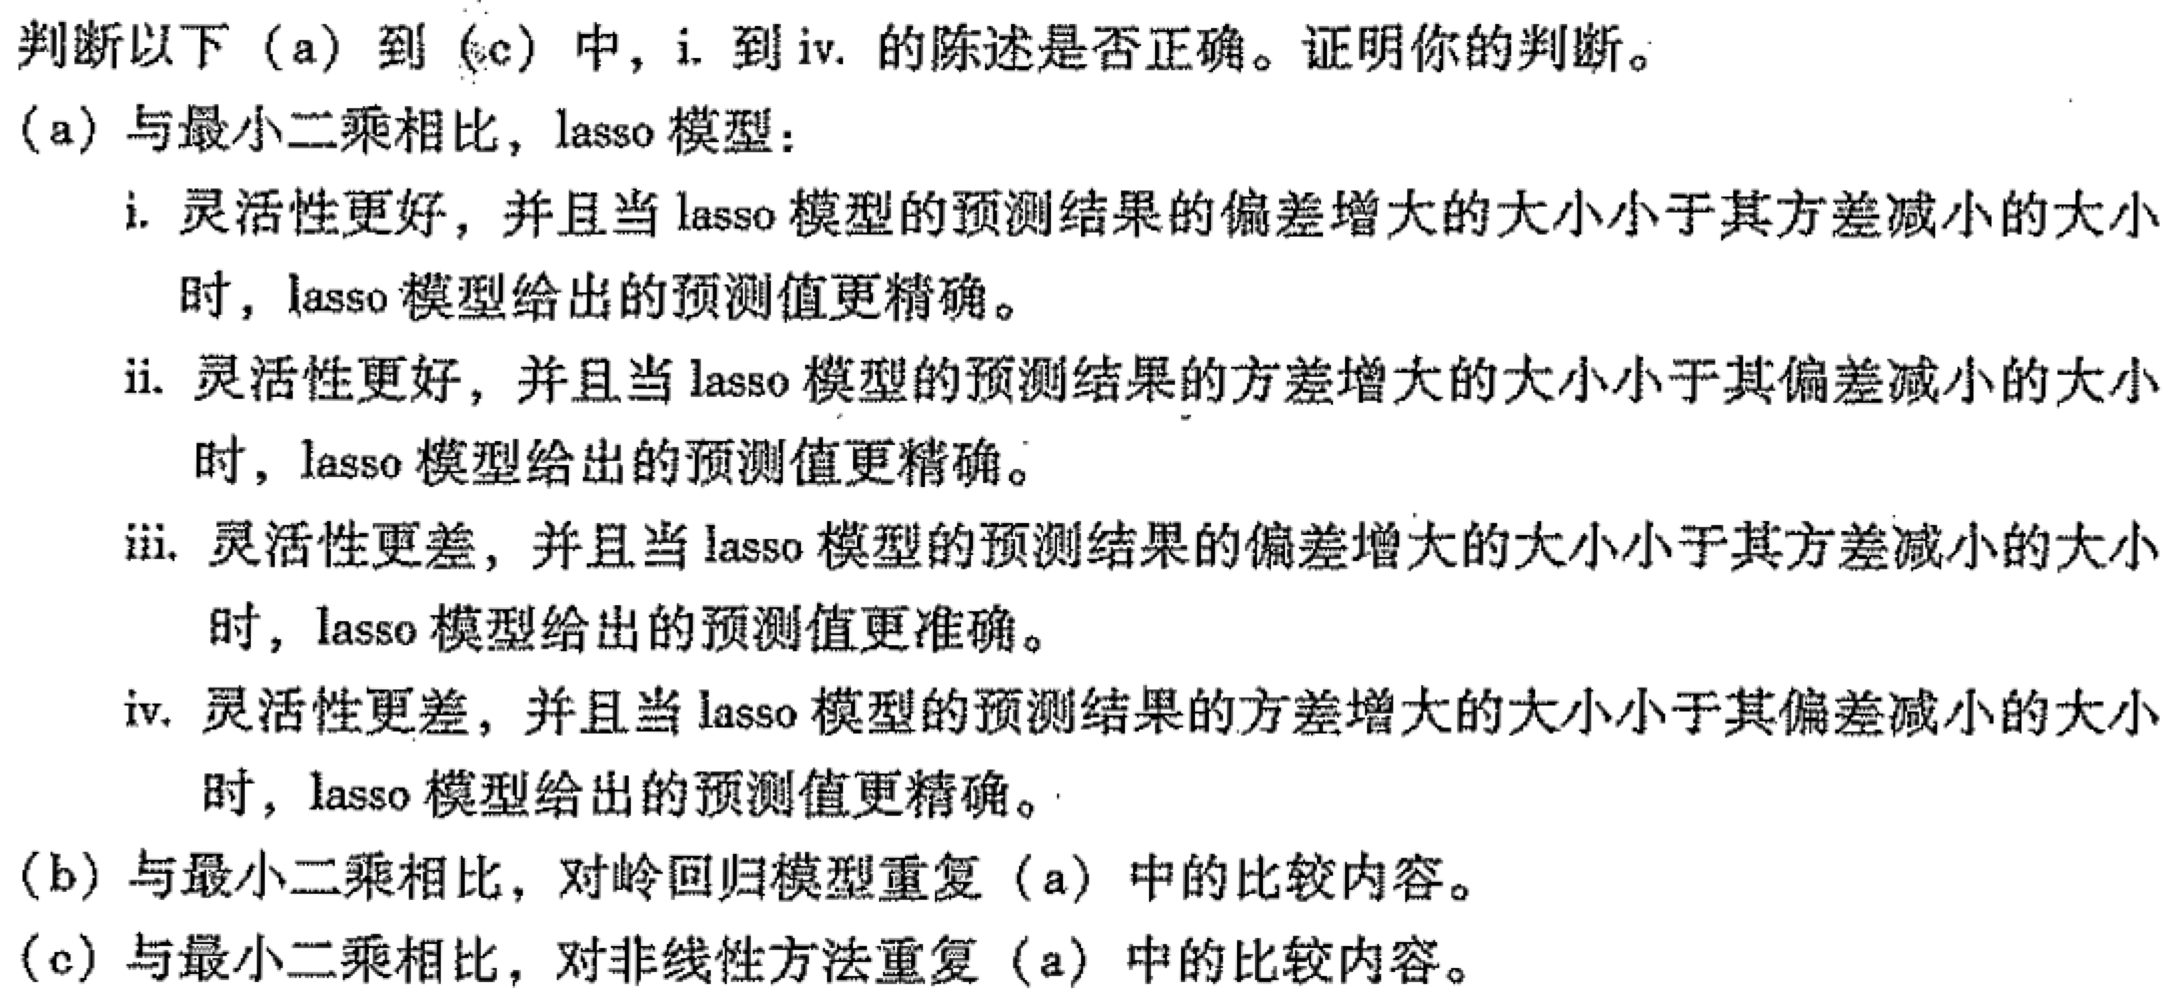

## a

第二个

## b

第二个

## c

第四个

# 第四题

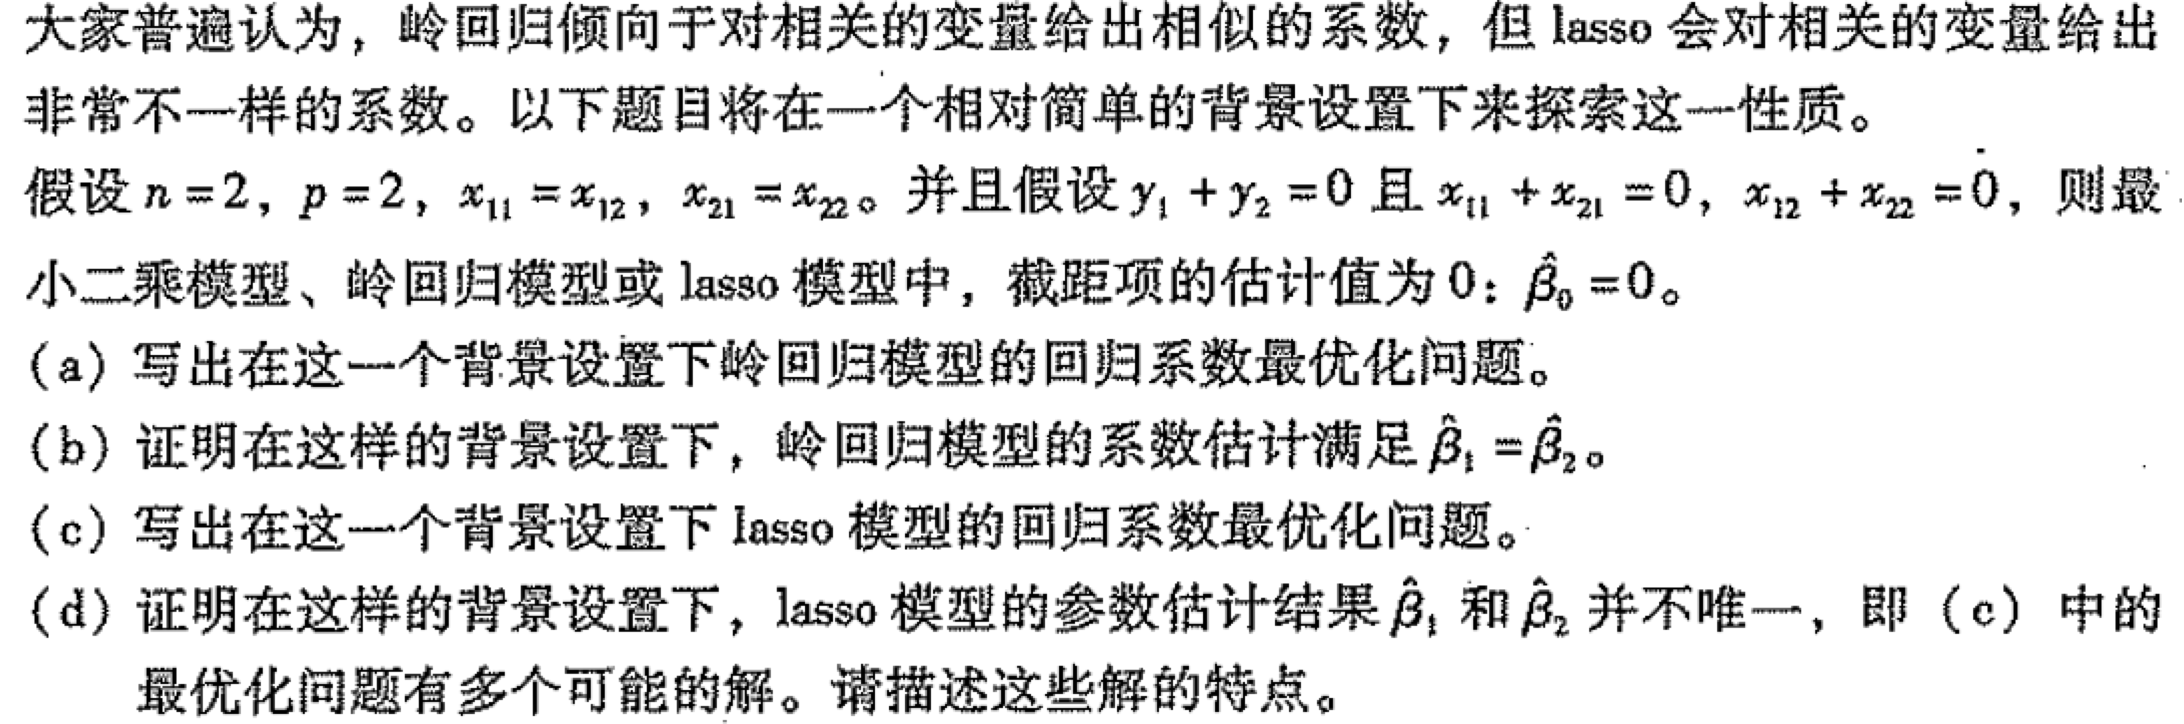

## a

由题目可以写出需要求解的回归方程：
\begin{equation}
\left\{
\begin{aligned}
y_1=\beta_1x_{11}+\beta_2x_{12} \\
y_2=\beta_1x_{21}+\beta_2x_{22}
\end{aligned}
\right.
\end{equation}
其中，$y_1=-y_2,x_{11}=-x_{12},x_{21}=-x_{22}$

在这样的背景下，损失函数为$\mathop{max}\limits_{w}(Xw-y)^2+\alpha w^2$,转化为求使得损失函数最小的$w$值。其中$\alpha$为岭回归模型的参数。

## b

岭回归中，使用最小二乘法可解得$w=(X'X+\alpha I)^{-1}X'Y$，由题目条件可知：

\begin{equation}
X'X+\alpha I=\\
\left(
\begin{array}{l}
x_{11} & x_{21}\\
x_{12} & x_{22}
\end{array}
\right)
\left(
\begin{array}{l}
x_{11} & x_{12}\\
x_{21} & x_{22}
\end{array}
\right)
+
\left(
\begin{array}{l}
\alpha & 0\\
0 & \alpha
\end{array}
\right)\\
=
\left(
\begin{array}{l}
\alpha+x_{11}^2+x_{21}^2 & -(x_{11}^2+x_{21}^2)\\
-(x_{11}^2+x_{21}^2) & \alpha+x_{11}^2+x_{21}^2
\end{array}
\right)\\
\end{equation}

令$x_{11}^2+x_{21}^2=c$,则有：

\begin{equation}
(X'X+\alpha I)^{-1}X'Y=\\
\frac{1}{(a+c)^2-c^2}
\left(
\begin{array}{l}
\alpha y_1(x_{11}-x{21})\\
\alpha y_1(x_{11}-x{21})
\end{array}
\right)
\end{equation}
也就是$\hat{\beta_1}=\hat{\beta_2}$

## c

在这样的背景下，损失函数为$\mathop{max}\limits_{w}(Xw-y)^2+\alpha w$,转化为求使得损失函数最小的$w$值。其中$\alpha$为Lasso模型的参数。

# 第五题

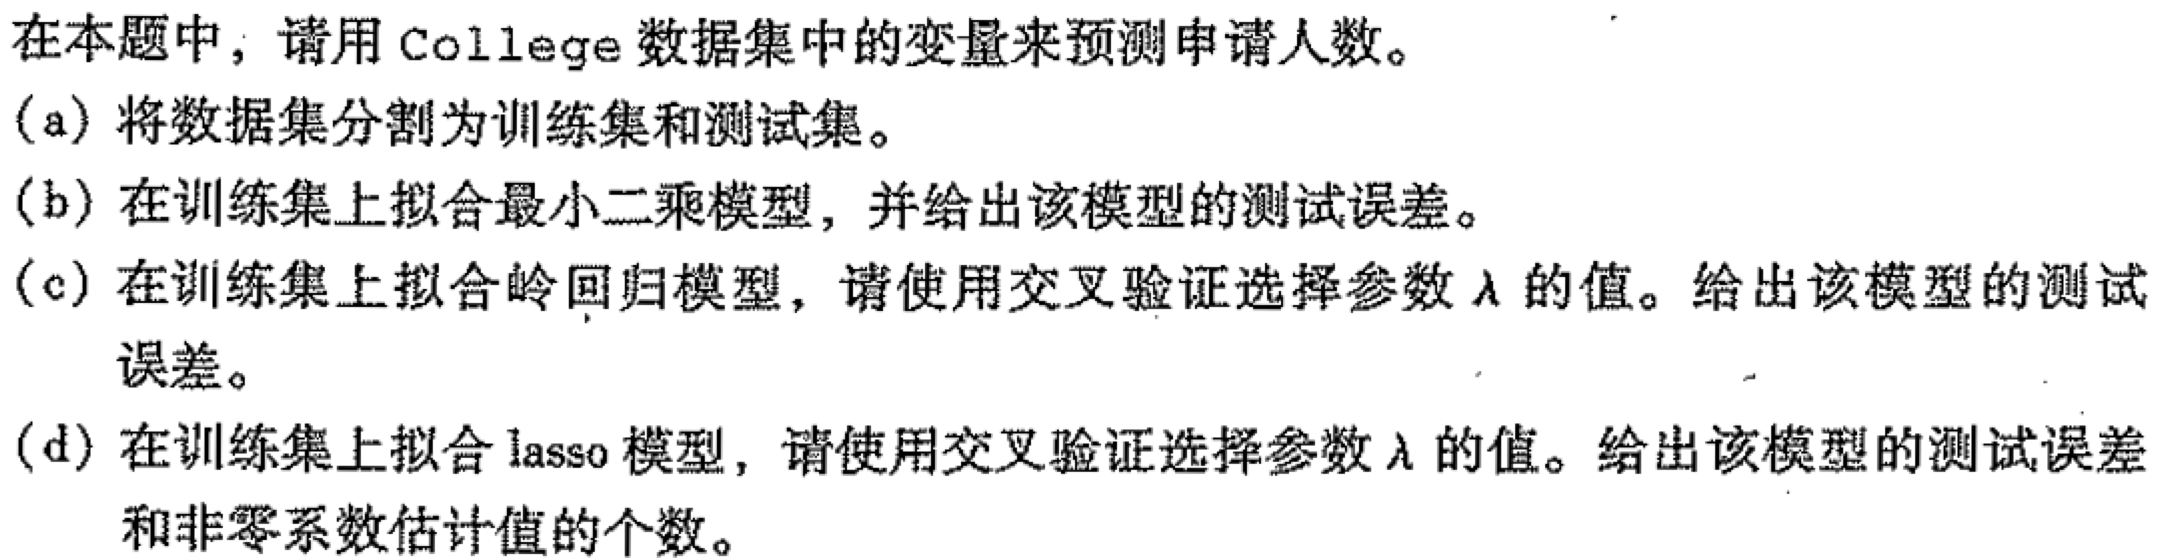

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression,Lasso 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 数据编码与划分

In [3]:
college_data = pd.read_csv('../data/College.csv')
#独热编码
college_data_dum = pd.get_dummies(college_data,columns = ['Private'])
#x，y
X = college_data_dum[['Private_No','Private_Yes','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']]
y = college_data_dum['Apps']
#训练集，测试集划分，分别为0.8，0.2
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## 拟合最小二乘模型

In [4]:
lr = LinearRegression(fit_intercept = True)
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
#测试误差
mse = np.average((y_predict - y_test)**2)
print('模型测试误差（均方误差）为：',mse)

模型测试误差（均方误差）为： 2640266.795179977


## 岭回归模型

In [11]:
#alpha为0时则为普通最小二乘法
reg = Ridge(alpha = 0).fit(x_train,y_train)

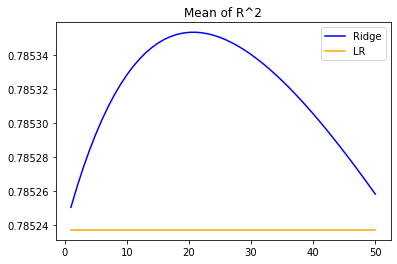

In [12]:
#交叉验证选择参数值
#线性回归与岭回归比较
from sklearn.model_selection import cross_val_score
alpha_list = np.arange(1,51)
ridge,lr = [],[]
for alpha in alpha_list:
    reg = Ridge(alpha = alpha)
    linear = LinearRegression()
    #cv:交叉验证的折数
    regs = cross_val_score(reg,X,y,cv = 5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv = 5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
#画图观察
plt.plot(alpha_list,ridge,color='blue',label='Ridge')
plt.plot(alpha_list,lr,color='orange',label='LR')
plt.title('Mean of R^2')
plt.legend()
plt.show()

In [23]:
#选择参数lambda
lambdas = list(alpha_list)
data = {'lambda值':lambdas,'岭回归R方':ridge,'线性回归R方':lr}
lambda_data = pd.DataFrame(data)
lambda_data[lambda_data['岭回归R方']==lambda_data['岭回归R方'].max()]

lambda值     岭回归R方    线性回归R方
20       21  0.785353  0.785237

当$\lambda=20$时，模型的判定系数最高，所以岭回归选择参数值为20.

In [25]:
#alpha为20
reg2 = Ridge(alpha = 20).fit(x_train,y_train)
y_predict_ridge = reg2.predict(x_test)
mse = np.average((y_predict_ridge - y_test)**2)
print('模型测试误差（均方误差）为：',mse)

模型测试误差（均方误差）为： 2648713.701807764


## Lasso模型

In [27]:
#lasso回归
lasso = Lasso(alpha = 1).fit(x_train,y_train)
#查看系数情况
(lasso.coef_).tolist()

[614.6559443009704,
 -5.909566934686711e-12,
 3.1148516742331074,
 19.08512882781583,
 2.2738688787649703,
 0.09912502743407116,
 -0.10961357204560984,
 0.012409421404606888,
 0.413102473311312,
 0.08219091901473483,
 -0.11333973351295379,
 -7.5275564520348786,
 -3.263016734053112,
 14.638876522618425,
 -26.789236017456727,
 0.07281556760248842,
 22.336941704164804]

In [37]:
#交叉验证选择参数值
from sklearn.linear_model import LassoCV
#np.logspace(start=开始值，stop=结束值，num=元素个数，base=指定对数的底, endpoint=是否包含结束值)
#np.logspace(-2,2,10)构造的是一个从10的-2次方到10的2次方的等比数列，这个等比数列的长度是10个元素。
alpharange = np.logspace(-2,20,20,base=10)
lasso = LassoCV(alphas = alpharange).fit(x_train,y_train)
lasso.alpha_

428.13323987193957

最终选择了428作为参数值

In [38]:
lasso = Lasso(alpha = 428.133).fit(x_train,y_train)
#查看系数情况
(lasso.coef_).tolist()

[0.0,
 -0.0,
 3.1521698978160875,
 14.703490611009052,
 1.7487902514902791,
 0.11864506467929674,
 -0.10998521521683398,
 -0.02323737580345617,
 0.3995976017143977,
 0.10101325964142238,
 -0.10567557582308795,
 -1.6694196229235785,
 -0.0,
 0.0,
 -23.21606518596625,
 0.07122182104329798,
 19.168986177158313]

得到该模型在17个系数中，非零系数估计值的个数为：11

In [39]:
y_predict_ls = lasso.predict(x_test)
mse = np.average((y_predict_ls - y_test)**2)
print('模型测试误差（均方误差）为：',mse)

模型测试误差（均方误差）为： 2715622.2641048874


# 学习小结

在数据预处理中，识别和正确处理缺失的值至关重要，如果做不到这一点，您可能会从数据中得出不准确和错误的结论和推论。不用说，这将妨碍ML项目。

分类数据是指在数据集中具有特定类别的信息。机器学习模型主要基于数学方程。因此，可以直观地理解，在方程中保留分类数据将导致某些问题，因为在方程中只需要数字。这就需要分类数据编码技术的采用。

数据集分割是机器学习中数据预处理的下一步。机器学习模型的每个数据集必须分成两个独立的集-训练集和测试集。

特征缩放标志着机器学习中数据预处理的结束。它是一种对特定范围内的数据集的自变量进行标准化的方法。换句话说，特征扩展限制了变量的范围，这样你就可以根据共同的理由来比较它们。

